In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# PLoting
lista_modelos = []
for i in range(12):
    lista_modelos.append(pd.read_csv('salidajobs1/salidamodelo'+str(i)+'nj1.csv', sep=';', index_col=False))

In [2]:
lista_modelos[0].describe()

,tiempo(Segundos),energia(Joules),ciclos,instrucciones,inst/ciclo,porcentajecpu
count,49.000000,49.000000,4.900000e+01,4.900000e+01,49.000000,41.00000
mean,0.004059,0.185714,1.000806e+08,2.574483e+07,1.275102,68.18122
std,0.004903,0.279777,1.638136e+08,2.315398e+07,0.588200,23.06440
min,0.001439,0.010000,2.773412e+06,8.812200e+05,0.440000,26.92000
25%,0.001479,0.030000,8.883754e+06,1.240230e+07,0.740000,49.97000
50%,0.001514,0.040000,1.447874e+07,1.891149e+07,1.400000,61.66000
75%,0.002427,0.110000,6.318117e+07,2.882146e+07,1.830000,89.29000
max,0.023917,1.270000,4.809597e+08,9.979026e+07,2.000000,100.00000


In [ ]:
#indice = 0,1,2
def boxplot_csv(lista_modelos, indice_columna):
    %pylab inline
    pylab.rcParams['figure.figsize'] = (14, 8)
    names = ['LoR', 'LDA', 'GNB', 'MLP', 'SVC', 'DT', 'k-NN', 'RF', 'ET', 'GBM', 'AB', 'VC']
    y_ejeName = ['Energy (J.)', 'Inst/cicle', 'CPU (%)']
    box_graphic_name = []
    column_list = list(lista_modelos[0].columns[[1,4,5,0]])
    df = pd.DataFrame(columns=names)
    column_plot = column_list[indice_columna]# 'energia(Joules)'
    column_time = column_list[-1]#'tiempo(Segundos)'
    interval_time = 0.001 # milesima de segundo
    #create dataframe
    ld = [len(lista_modelos2[i][column_plot]) for i in list(range(12))]
    index_top = ld.index(max(ld))
    df[names[index_top]] = lista_modelos[index_top][column_plot]
    for i in range(12):
        #df[names[i]] = lista_modelos[i]['energia(Joules)']*1000
        # estandarize
        df[names[i]] = lista_modelos[i][column_plot]*interval_time/lista_modelos[i][column_time]
    #display(df.head())
    """
        PLOT
    """
    medians = np.round(list(df.mean()),3)
    median_labels = [str(i) for i in medians]
    sns.set_style("whitegrid")
    y_label = y_ejeName[indice_columna]
    x_label = 'Models'
    ax_plot = sns.boxplot(data=df, linewidth = 1.0)
    ax_plot.set_xlabel(x_label,fontsize=18)
    ax_plot.set_ylabel(y_label,fontsize=18)
    plt.rc('xtick', labelsize=15) 
    plt.rc('ytick', labelsize=15)

    tope = [0.1, 3, 100][indice_columna]
    var_tope = [0.01, 0.2, 5][indice_columna]
    save_name = ['CPU_8', 'INST_CICLO_8', 'ENERGY_8'][indice_columna]+'.eps'
    pos = range(len(names))
    for tick,label in zip(pos,ax_plot.get_xticklabels()):
        ax_plot.text(pos[tick], tope-var_tope, median_labels[tick], 
                horizontalalignment='center', color='black', fontsize=15) #, weight='semibold'
    axes = plt.gca()
    axes.set_ylim([-var_tope/2, tope])
    print(column_list[indice_columna])
    plt.savefig(save_name, bbox_inches='tight')

In [173]:
#indice = 0,1,2
def boxplot_csv(lista_modelos, indice_columna):
    %pylab inline
    pylab.rcParams['figure.figsize'] = (14, 8)
    names = ['LoR', 'LDA', 'GNB', 'MLP', 'SVC', 'DT', 'k-NN', 'RF', 'ET', 'GBM', 'AB', 'VC']
    y_ejeName = ['Energy (J.)', 'Inst/cicle', 'CPU (%)']
    box_graphic_name = []
    column_list = list(lista_modelos[0].columns[[1,4,5,0]])
    df = pd.DataFrame(columns=names)
    column_plot = column_list[indice_columna]# 'energia(Joules)'
    column_time = column_list[-1]#'tiempo(Segundos)'
    interval_time = 0.001 # milesima de segundo
    #create dataframe
    ld = [len(lista_modelos2[i][column_plot]) for i in list(range(12))]
    index_top = ld.index(max(ld))
    df[names[index_top]] = lista_modelos[index_top][column_plot]
    for i in range(12):
        #df[names[i]] = lista_modelos[i]['energia(Joules)']*1000
        # estandarize
        df[names[i]] = lista_modelos[i][column_plot]*interval_time/lista_modelos[i][column_time]
    #display(df.head())
    """
        PLOT
    """
    medians = np.round(list(df.mean()),3)
    median_labels = [str(i) for i in medians]
    sns.set_style("whitegrid")
    y_label = y_ejeName[indice_columna]
    x_label = 'Models'
    ax_plot = sns.boxplot(data=df, linewidth = 1.0)
    ax_plot.set_xlabel(x_label,fontsize=18)
    ax_plot.set_ylabel(y_label,fontsize=18)
    plt.rc('xtick', labelsize=15) 
    plt.rc('ytick', labelsize=15)

    tope = [0.1, 3, 100][indice_columna]
    var_tope = [0.01, 0.2, 5][indice_columna]
    save_name = ['CPU_8', 'INST_CICLO_8', 'ENERGY_8'][indice_columna]+'.eps'
    pos = range(len(names))
    for tick,label in zip(pos,ax_plot.get_xticklabels()):
        ax_plot.text(pos[tick], tope-var_tope, median_labels[tick], 
                horizontalalignment='center', color='black', fontsize=15) #, weight='semibold'
    axes = plt.gca()
    axes.set_ylim([-var_tope/2, tope])
    print(column_list[indice_columna])
    plt.savefig(save_name, bbox_inches='tight')

# SECUENCIAL

Populating the interactive namespace from numpy and matplotlib
energia(Joules)


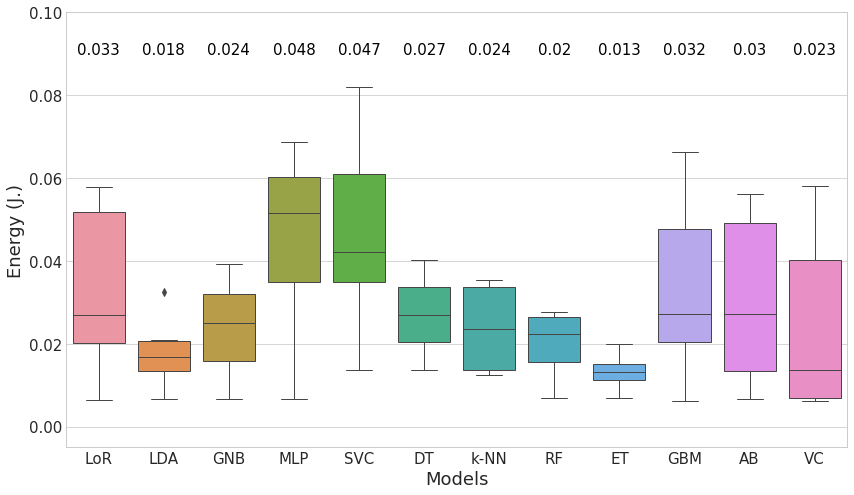

In [170]:
boxplot_csv(lista_modelos, 0)

Populating the interactive namespace from numpy and matplotlib
inst/ciclo


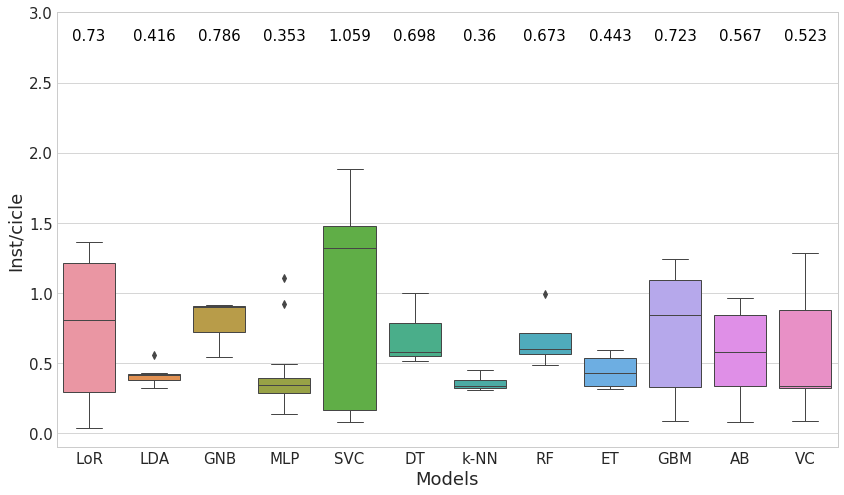

In [171]:
boxplot_csv(lista_modelos, 1)

Populating the interactive namespace from numpy and matplotlib
porcentajecpu


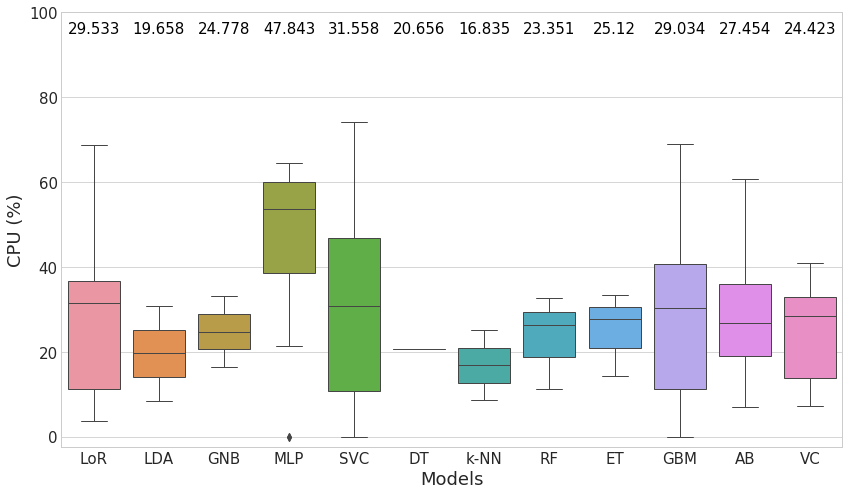

In [172]:
boxplot_csv(lista_modelos, 2)

# MULTIHILO

In [176]:
lista_modelos2 = []
for i in range(12):
    #lista_modelos2.append(pd.read_csv('salidamodelo'+str(i)+'v2.csv', sep=';', index_col=False))
    lista_modelos2.append(pd.read_csv('salidajobs8/salidamodelo'+str(i)+'nj1.csv', sep=';', index_col=False))

In [177]:
lista_modelos2[0].describe()

,tiempo(Segundos),energia(Joules),ciclos,instrucciones,inst/ciclo,porcentajecpu
count,43.000000,43.000000,4.300000e+01,4.300000e+01,43.000000,41.000000
mean,0.004397,0.210698,1.038482e+08,3.089735e+07,1.336047,61.003415
std,0.004628,0.255580,1.482033e+08,2.302082e+07,0.553376,24.581523
min,0.001426,0.010000,2.745590e+06,1.426109e+06,0.480000,0.000000
25%,0.001474,0.040000,9.708146e+06,1.592222e+07,0.765000,44.520000
50%,0.001577,0.060000,1.496403e+07,2.570077e+07,1.630000,53.330000
75%,0.009902,0.495000,2.413657e+08,3.003624e+07,1.855000,87.500000
max,0.012899,0.680000,4.798596e+08,9.369052e+07,2.030000,100.000000


Populating the interactive namespace from numpy and matplotlib
energia(Joules)


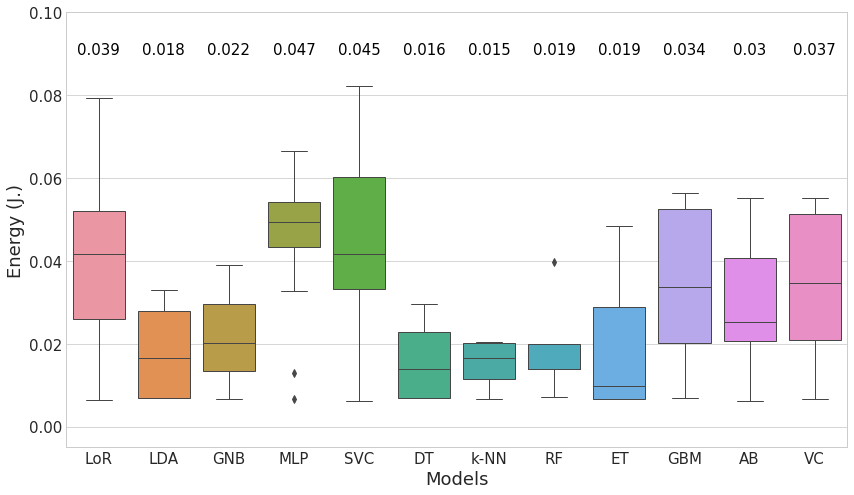

In [178]:
boxplot_csv(lista_modelos2, 0)

Populating the interactive namespace from numpy and matplotlib
inst/ciclo


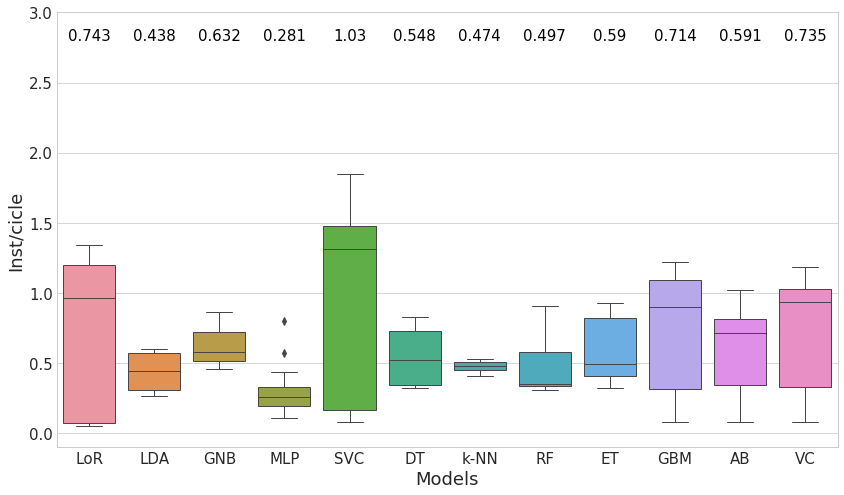

In [179]:
boxplot_csv(lista_modelos2, 1)

Populating the interactive namespace from numpy and matplotlib
porcentajecpu


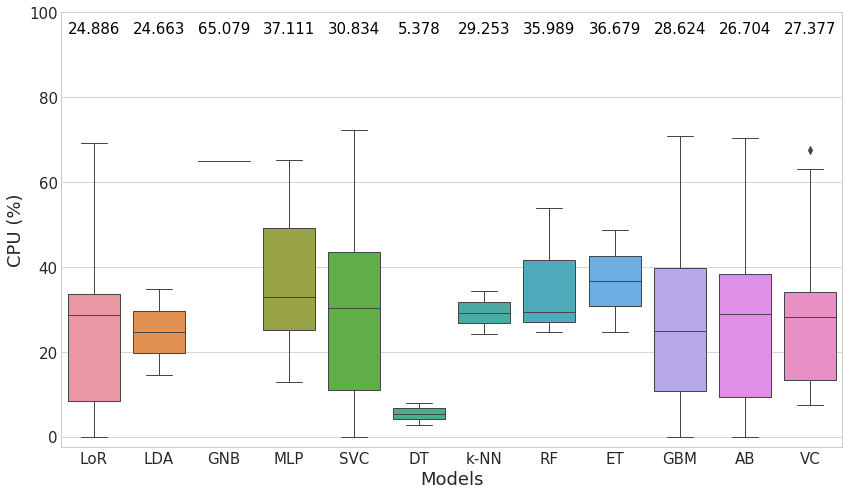

In [180]:
boxplot_csv(lista_modelos2, 2)